In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [2]:
music.head(5)

,duration,loudness,bpm
0,184,18,105
1,134,34,90
2,243,43,78
3,186,36,75
4,122,22,120


In [3]:
music.shape

(30, 3)

### Everything's the Same
### Switching KNN to a regression is a simple process. In our previous models, each of the  𝑘 oberservations voted for a category. As a regression they vote instead for a value. Then instead of taking the most popular response, the algorithm averages all of the votes. If you have weights you perform a weighted average.

### It's really that simple.

### Let's go over a quick example just to confirm your understanding.

### Let's stick with the world of music. Instead of trying to classify songs as rock or jazz, lets take the same data with an additional column: beats per minute, or BPM. Can we train our model to predict BPM?

### First let's try to predict just in terms of loudness, as this will be easier to represent graphically.

    loudness
0         18
1         34
2         43
3         36
4         22
5          9
6         29
7         22
8         10
9         24
10        20
11        10
12        17
13        51
14         7
15        13
16        19
17        12
18        21
19        22
20        16
21        18
22         4
23        23
24        34
25        19
26        14
27        11
28        37
29        42
[[  0. ]
 [  0.1]
 [  0.2]
 [  0.3]
 [  0.4]
 [  0.5]
 [  0.6]
 [  0.7]
 [  0.8]
 [  0.9]
 [  1. ]
 [  1.1]
 [  1.2]
 [  1.3]
 [  1.4]
 [  1.5]
 [  1.6]
 [  1.7]
 [  1.8]
 [  1.9]
 [  2. ]
 [  2.1]
 [  2.2]
 [  2.3]
 [  2.4]
 [  2.5]
 [  2.6]
 [  2.7]
 [  2.8]
 [  2.9]
 [  3. ]
 [  3.1]
 [  3.2]
 [  3.3]
 [  3.4]
 [  3.5]
 [  3.6]
 [  3.7]
 [  3.8]
 [  3.9]
 [  4. ]
 [  4.1]
 [  4.2]
 [  4.3]
 [  4.4]
 [  4.5]
 [  4.6]
 [  4.7]
 [  4.8]
 [  4.9]
 [  5. ]
 [  5.1]
 [  5.2]
 [  5.3]
 [  5.4]
 [  5.5]
 [  5.6]
 [  5.7]
 [  5.8]
 [  5.9]
 [  6. ]
 [  6.1]
 [  6.2]
 [  6.3]
 [  6.4]
 [  6.5]
 [ 

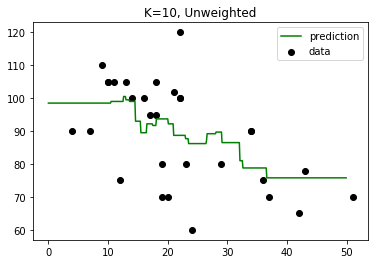

In [4]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

print(X)

# Set up our prediction line.
#numpy.arange([start, ]stop, [step, ]dtype=None)
T = np.arange(0, 50, 0.1)[:, np.newaxis]

print (T)

print (T.shape)

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

print (Y_)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

    loudness
0         18
1         34
2         43
3         36
4         22
5          9
6         29
7         22
8         10
9         24
10        20
11        10
12        17
13        51
14         7
15        13
16        19
17        12
18        21
19        22
20        16
21        18
22         4
23        23
24        34
25        19
26        14
27        11
28        37
29        42
[[  0. ]
 [  0.1]
 [  0.2]
 [  0.3]
 [  0.4]
 [  0.5]
 [  0.6]
 [  0.7]
 [  0.8]
 [  0.9]
 [  1. ]
 [  1.1]
 [  1.2]
 [  1.3]
 [  1.4]
 [  1.5]
 [  1.6]
 [  1.7]
 [  1.8]
 [  1.9]
 [  2. ]
 [  2.1]
 [  2.2]
 [  2.3]
 [  2.4]
 [  2.5]
 [  2.6]
 [  2.7]
 [  2.8]
 [  2.9]
 [  3. ]
 [  3.1]
 [  3.2]
 [  3.3]
 [  3.4]
 [  3.5]
 [  3.6]
 [  3.7]
 [  3.8]
 [  3.9]
 [  4. ]
 [  4.1]
 [  4.2]
 [  4.3]
 [  4.4]
 [  4.5]
 [  4.6]
 [  4.7]
 [  4.8]
 [  4.9]
 [  5. ]
 [  5.1]
 [  5.2]
 [  5.3]
 [  5.4]
 [  5.5]
 [  5.6]
 [  5.7]
 [  5.8]
 [  5.9]
 [  6. ]
 [  6.1]
 [  6.2]
 [  6.3]
 [  6.4]
 [  6.5]
 [ 

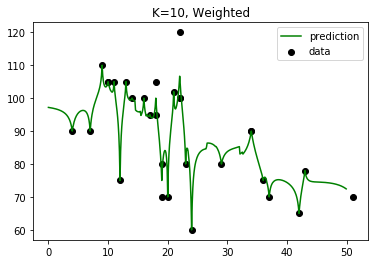

In [5]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

print (X)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

print (T)

print (T.shape)

Y_ = knn_w.predict(T)

print (Y_)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [6]:
from sklearn.model_selection import cross_val_score

#cv : int, cross-validation generator or an iterable, optional
#Determines the cross-validation splitting strategy. Possible inputs for cv are:

#None, to use the default 3-fold cross validation,
#integer, to specify the number of folds in a (Stratified)KFold,
#CV splitter,
#An iterable yielding (train, test) splits as arrays of indices.

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


### Why don't you add the other feature and mess around with  𝑘  and weighting to see if you can do any better than we've done so far?

In [7]:
#df.isnull().values.any()
music.isnull().values.any()

False

In [8]:
# Build our model adding the other feature: duration.
knn = neighbors.KNeighborsRegressor(n_neighbors=1)
X = music[['loudness', 'duration']]
X = X.values.reshape(1, -1)
Y = music[['bpm']]
Y = Y.values.reshape(1, -1)

print (X)
print (Y)

[[ 18 184  34 134  43 243  36 186  22 122   9 197  29 294  22 382  10 102
   24 264  20 205  10 110  17 307  51 110   7 397  13 153  19 190  12 192
   21 210  22 403  16 164  18 198   4 204  23 253  34 234  19 190  14 182
   11 401  37 376  42 102]]
[[105  90  78  75 120 110  80 100 105  60  70 105  95  70  90 105  70  75
  102 100 100  95  90  80  90  80 100 105  70  65]]


In [9]:
print (X.shape)

(1, 60)


In [10]:
print (Y.shape)

(1, 30)


In [11]:
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [12]:
# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]


In [13]:
print (T)

[[  0. ]
 [  0.1]
 [  0.2]
 [  0.3]
 [  0.4]
 [  0.5]
 [  0.6]
 [  0.7]
 [  0.8]
 [  0.9]
 [  1. ]
 [  1.1]
 [  1.2]
 [  1.3]
 [  1.4]
 [  1.5]
 [  1.6]
 [  1.7]
 [  1.8]
 [  1.9]
 [  2. ]
 [  2.1]
 [  2.2]
 [  2.3]
 [  2.4]
 [  2.5]
 [  2.6]
 [  2.7]
 [  2.8]
 [  2.9]
 [  3. ]
 [  3.1]
 [  3.2]
 [  3.3]
 [  3.4]
 [  3.5]
 [  3.6]
 [  3.7]
 [  3.8]
 [  3.9]
 [  4. ]
 [  4.1]
 [  4.2]
 [  4.3]
 [  4.4]
 [  4.5]
 [  4.6]
 [  4.7]
 [  4.8]
 [  4.9]
 [  5. ]
 [  5.1]
 [  5.2]
 [  5.3]
 [  5.4]
 [  5.5]
 [  5.6]
 [  5.7]
 [  5.8]
 [  5.9]
 [  6. ]
 [  6.1]
 [  6.2]
 [  6.3]
 [  6.4]
 [  6.5]
 [  6.6]
 [  6.7]
 [  6.8]
 [  6.9]
 [  7. ]
 [  7.1]
 [  7.2]
 [  7.3]
 [  7.4]
 [  7.5]
 [  7.6]
 [  7.7]
 [  7.8]
 [  7.9]
 [  8. ]
 [  8.1]
 [  8.2]
 [  8.3]
 [  8.4]
 [  8.5]
 [  8.6]
 [  8.7]
 [  8.8]
 [  8.9]
 [  9. ]
 [  9.1]
 [  9.2]
 [  9.3]
 [  9.4]
 [  9.5]
 [  9.6]
 [  9.7]
 [  9.8]
 [  9.9]
 [ 10. ]
 [ 10.1]
 [ 10.2]
 [ 10.3]
 [ 10.4]
 [ 10.5]
 [ 10.6]
 [ 10.7]
 [ 10.8]
 [ 10.9]
 [ 11. ]
 

In [14]:
T = T.reshape(1, -1)

In [15]:
print (T)

[[  0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.1
    1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.    2.1   2.2   2.3
    2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1   3.2   3.3   3.4   3.5
    3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5   4.6   4.7
    4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.8   5.9
    6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.    7.1
    7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3
    8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5
    9.6   9.7   9.8   9.9  10.   10.1  10.2  10.3  10.4  10.5  10.6  10.7
   10.8  10.9  11.   11.1  11.2  11.3  11.4  11.5  11.6  11.7  11.8  11.9
   12.   12.1  12.2  12.3  12.4  12.5  12.6  12.7  12.8  12.9  13.   13.1
   13.2  13.3  13.4  13.5  13.6  13.7  13.8  13.9  14.   14.1  14.2  14.3
   14.4  14.5  14.6  14.7  14.8  14.9  15.   15.1  15.2  15.3  15.4  15.5
   15.6  15.7  15.8  15.9  16.   16.1 

In [16]:
print (T.ndim)

2


In [17]:
print (T.shape) #(rows, columns)

(1, 500)


In [18]:
print (T.size)

500


In [19]:
# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 500 while Y.shape[1] == 60

In [ ]:
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()